#### Challenge Set 4 

**Topic:** Linear Regression and Learning Curve  
**Date:** 17 October 2016  
**Name:** Ron Olshansky-Lucero  

In [385]:
# Python 2/3 compatibility
from __future__ import print_function, division

#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from datetime import datetime

plt.style.use('fivethirtyeight')
%matplotlib inline

#### Exercise 4.1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters).

Simulate some data from this model.

Then fit 2 models to it:

- quadratic (second degree polynomial)
- logarithmic (log(x))

(The second one should fit really well, since it has the same form as the underlying model!).

In [386]:
# simulate 1000 data points
N = 1000
np.random.seed(36)

# construct x-axis points for plotting
# x = np.linspace(1, 100, N) # 1000 evenly-spaced points between 1 and 100
x = np.linspace(1, 100, N)

# randomly generated integer-valued betas
b0 = np.random.randint(1,5)
b1 = np.random.randint(1,10)

# generate error term from a normal distribution
# - automatically satisfies assumption of normally distributed error terms
epsilon = np.random.normal(0, 1, N)

# generate y-values related to log(x)
y = b0 + b1*np.log(x) + epsilon

In [387]:
print(x.shape)
print(y.shape)

(1000,)
(1000,)


In [388]:
# reshape x and y into vectors
# - need to do this before passing into models below
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x.shape, y.shape)

(1000, 1) (1000, 1)


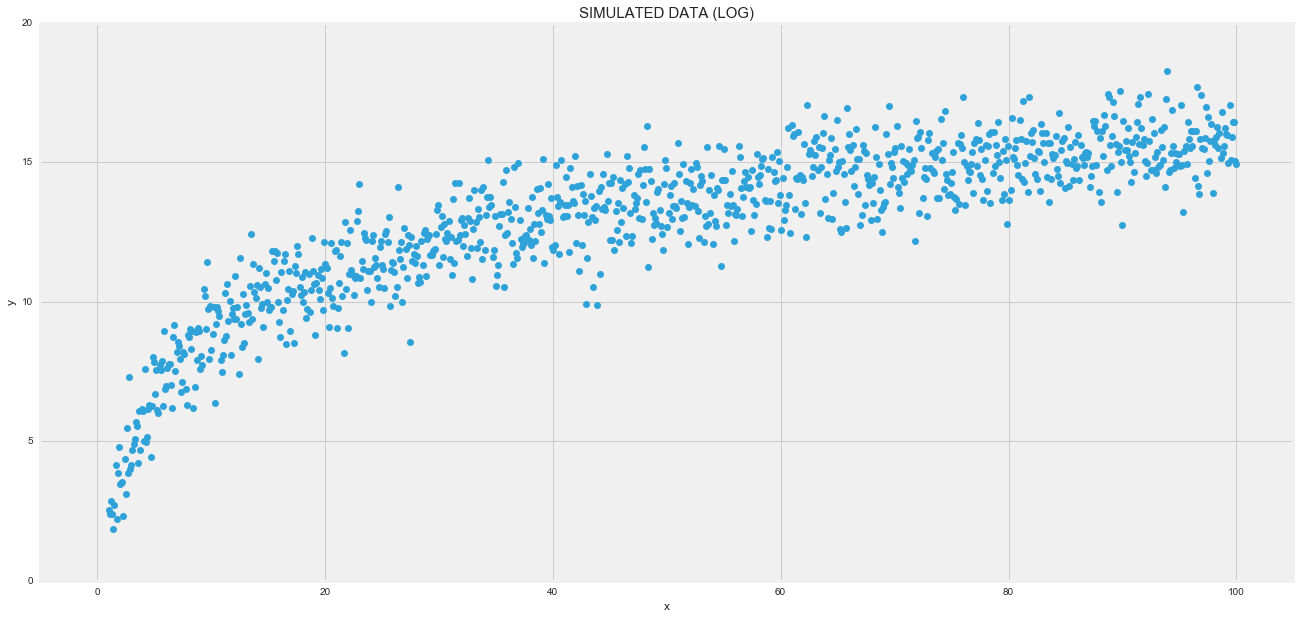

In [389]:
# plot generated data
plt.figure(figsize = (20, 10))
plt.title('SIMULATED DATA (LOG)', fontsize = 15)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-5, 105])
plt.plot(x, y, 'o');

In [390]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 36)

In [391]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 1)
(300, 1)
(700, 1)
(300, 1)


#### Quadratic Fit (lm1)

In [392]:
# create an instance of LinearRegression class with quadratic term
lm1 = make_pipeline(PolynomialFeatures(2), LinearRegression())

# fit quadratic model to training data
lm1.fit(X_train, y_train);

In [393]:
# training set prediction
y_train_pred = lm1.predict(X_train)

# test set prediction
y_test_pred = lm1.predict(X_test)

In [394]:
# score model (this is R^2)
print(lm1.score(X_test, y_test))
# metrics.r2_score
print(metrics.r2_score(y_test, y_test_pred))

0.813391590084
0.813391590084


In [395]:
# MSE - training set
print(metrics.mean_squared_error(y_train, y_train_pred))
# MSE - test set
print(metrics.mean_squared_error(y_test, y_test_pred))

1.46003465015
1.51560472823


#### Log Fit (lm1)

In [396]:
# instantiate a LinearRegression object
lm2 = LinearRegression()

In [397]:
# fit log model to training data
# - take the log of the predictor to linearise its relationship with y
lm2.fit(np.log(X_train), y_train);

In [398]:
# training set prediction
y2_train_pred = lm2.predict(np.log(X_train))

# test set prediction
y2_test_pred = lm2.predict(np.log(X_test))

In [399]:
# score model (this is R^2)
print(lm2.score(np.log(X_test), y_test))
# metrics.r2_score
print(metrics.r2_score(y_test, y2_test_pred))

0.871753711853
0.871753711853


In [400]:
# MSE - training set
print(metrics.mean_squared_error(y_train, y2_train_pred))
# MSE - test set
print(metrics.mean_squared_error(y_test, y2_test_pred))

1.03069102753
1.04159657532


Comparing the MSE between the quadratic and log models, the log model has a much lower MSE (train = 1.03, test = 1.04) compared to the MSE of the quadratic model (train = 1.46, test = 1.52).

#### Exercise 4.2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon` (You are making up the parameters).

Split the data into a training and test set.

Fit a model to your training set. Calculate MSE on your training set, then calculate it on your test set (You could use `sklearn.metrics.mean_squared_error`).

In [401]:
# simulate 1000 data points
N = 1000
np.random.seed(36)

# construct x-axis points for plotting
# x = np.linspace(1, 100, N) # 1000 evenly-spaced points between 1 and 100
x2 = np.linspace(1, 100, N)

# randomly generated integer-valued betas
b0 = np.random.randint(1,5)
b1 = np.random.randint(1,10)
b2 = np.random.randint(1,10)

# generate error term from a normal distribution
# - automatically satisfies assumption of normally distributed error terms
epsilon = np.random.normal(0, 1, N)

# generate y-values related to x^2
y2 = b0 + b1*x2 + b2*np.power(x2,2) + epsilon

In [402]:
print(x2.shape)
print(y2.shape)

(1000,)
(1000,)


In [403]:
# reshape x and y into vectors
# - need to do this before passing into models below
x2 = x2.reshape(-1,1)
y2 = y2.reshape(-1,1)
print(x2.shape, y2.shape)

(1000, 1) (1000, 1)


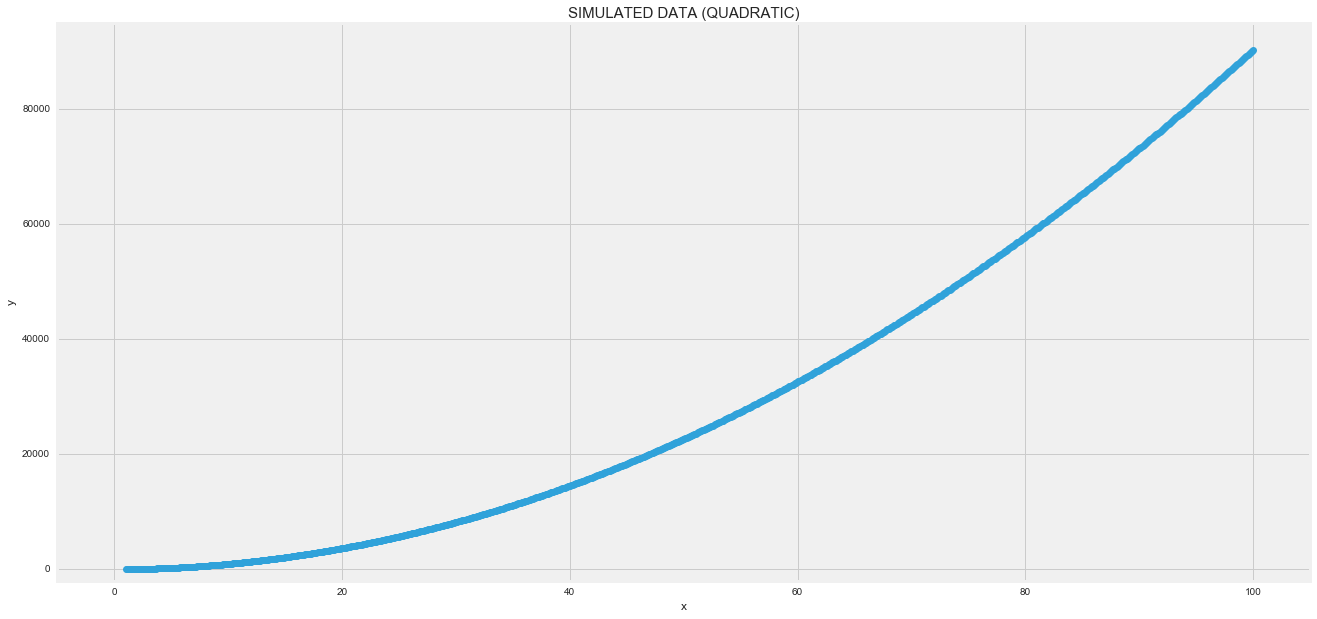

In [404]:
# plot generated data
plt.figure(figsize = (20, 10))
plt.title('SIMULATED DATA (QUADRATIC)', fontsize = 15)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-5, 105])
plt.ylim([-2000, 95000])
plt.plot(x2, y2, 'o');

In [405]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 36)

In [406]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 1)
(300, 1)
(700, 1)
(300, 1)


#### Fit a model (quadratic) to training set

In [407]:
# create an instance of LinearRegression class with quadratic term
lm3 = make_pipeline(PolynomialFeatures(2), LinearRegression())

# fit quadratic model to training data
lm3.fit(X_train, y_train);

In [408]:
# training set prediction
y3_train_pred = lm3.predict(X_train)

# test set prediction
y3_test_pred = lm3.predict(X_test)

In [409]:
# score model (this is R^2)
print(lm3.score(X_test, y_test))
# metrics.r2_score
print(metrics.r2_score(y_test, y3_test_pred))

0.999999998605
0.999999998605


In [410]:
# MSE - training set
print(metrics.mean_squared_error(y_train, y3_train_pred))
# MSE - test set
print(metrics.mean_squared_error(y_test, y3_test_pred))

1.07168169595
1.02954442904


Fitting a quadratic to the dataset with known quadratic form yields a very high R^2 and rather low MSE. In fact, the MSE for both training and test sets are rather close to each other (train MSE = 1.07 vs. test MSE = 1.03).

#### Exercise 4.3

For the data from 4.2 above, try polynomial fits from 0th (just constant) to 7th order. Over the x-axis of model degree (8 points), plot:

- training error
- test error
- R squared


In [411]:
# construct lists for errors and scores
train_errors = []
test_errors = []
r2_scores = []

# split the data first
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3)

# fit different orders of polynomials
d = 8
for degree in range(0, d+1):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)

    # compute predicted values
    y_train_pred = est.predict(X_train) # training set
    y_test_pred = est.predict(X_test) # test set

    # compute MSEs
    train_MSE = mean_squared_error(y_train, y_train_pred) # training set
    test_MSE = mean_squared_error(y_test, y_test_pred) # test set

    # compute R^2 (test set only)
    test_r2 = metrics.r2_score(y_test, y_test_pred)

    train_errors.append(train_MSE)
    test_errors.append(test_MSE)
    r2_scores.append(test_r2)

(-0.1, 1.1)

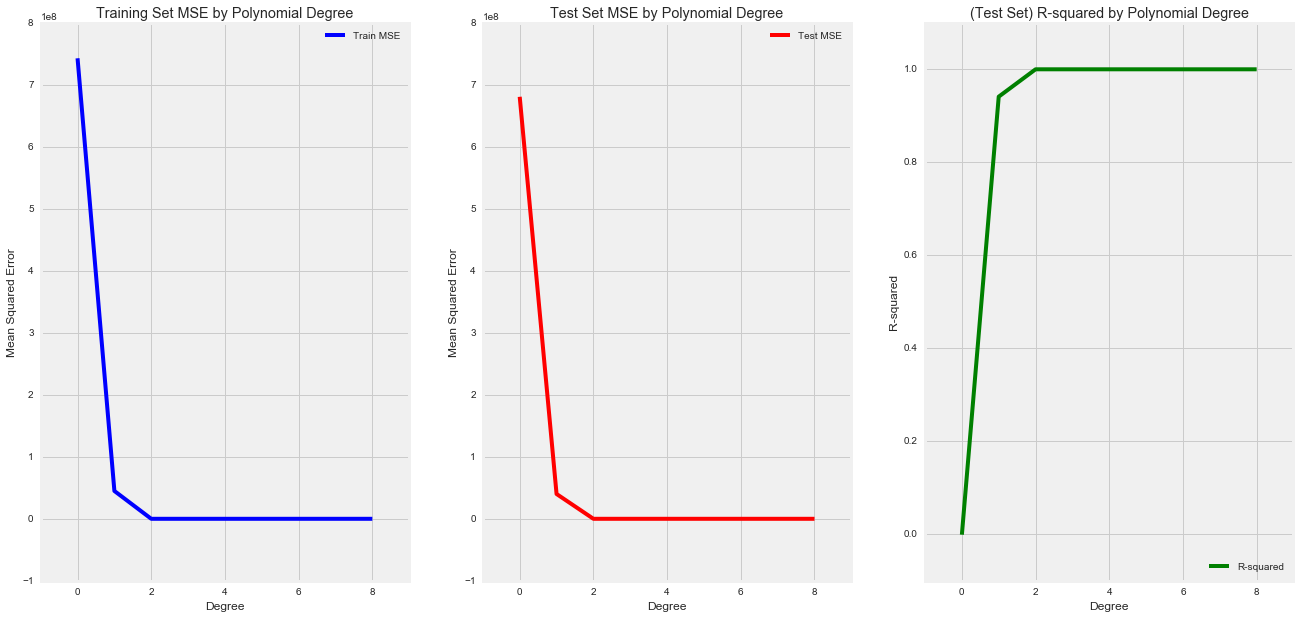

In [412]:
# plots

fig, ax = plt.subplots(1, 3, figsize = (20, 10))

degrees = list(range(0, 9))

ax[0].plot(degrees, train_errors, color = 'blue', label = 'Train MSE')
ax[0].set_title('Training Set MSE by Polynomial Degree')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Mean Squared Error')
ax[0].legend(loc = 'upper right')
ax[0].set_xlim((-1, 9))
ax[0].set_ylim((-1e8, 8e8))

ax[1].plot(degrees, test_errors, color = 'red', label = 'Test MSE')
ax[1].set_title('Test Set MSE by Polynomial Degree')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Mean Squared Error')
ax[1].legend(loc = 'upper right')
ax[1].set_xlim((-1, 9))
ax[1].set_ylim((-1e8, 8e8))

ax[2].plot(degrees, r2_scores, color = 'green', label = 'R-squared')
ax[2].set_title('(Test Set) R-squared by Polynomial Degree')
ax[2].set_xlabel('Degree')
ax[2].set_ylabel('R-squared')
ax[2].legend(loc = 'lower right')
ax[2].set_xlim((-1, 9))
ax[2].set_ylim((-0.1, 1.1))


# plt.subplot(1, 3, 3)
# plt.title('(Test Set) R-squared by Polynomial Degree')
# plt.plot(degrees, r2_scores)
# plt.xlabel('Degree')
# plt.ylabel('R-squared')


The plots above show that the best degree to fit is a second order (degree = 2) polynomial, because there are no further gains from fitting a higher order polynomial.

The MSE for both training and test sets show that the minimum is reached as soon as the degree is 2, and beyond that, the MSE does not improve further.

As well, the R-squared is maximised as soon as degree 2 is fitted, and stays at the same maximum for higher degrees.

#### Exercise 4.4

For the data from 4.2 above, fit a model to only the first 5 of your data points (m = 5), then to the first 10 (m = 10), then to the first 15 (m = 15). In this manner, keep fitting until you fit your entire training set.

For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [413]:
# initialise lists
training_errors = []
testing_errors = []
m_list = []

In [414]:
print(x.shape, y.shape)

(1000, 1) (1000, 1)


In [415]:
# split the data (from simulated quadratic model)
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3)

In [416]:
for size in range(5,len(y_train),5):
    poly = PolynomialFeatures(2)
    ym_train = y_train[0:size]
    xm_train = x_train[0:size]
    Xm_train = poly.fit_transform(xm_train)
    X_test = poly.fit_transform(x_test)
    est = sm.OLS(ym_train, Xm_train)
    fit = est.fit()
    
    ym_train_pred = fit.predict(Xm_train)
    y_test_pred = fit.predict(X_test)
    
    train_MSE = mean_squared_error(ym_train, ym_train_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    
    training_errors.append(train_MSE)
    testing_errors.append(test_MSE)
    m_list.append(size)


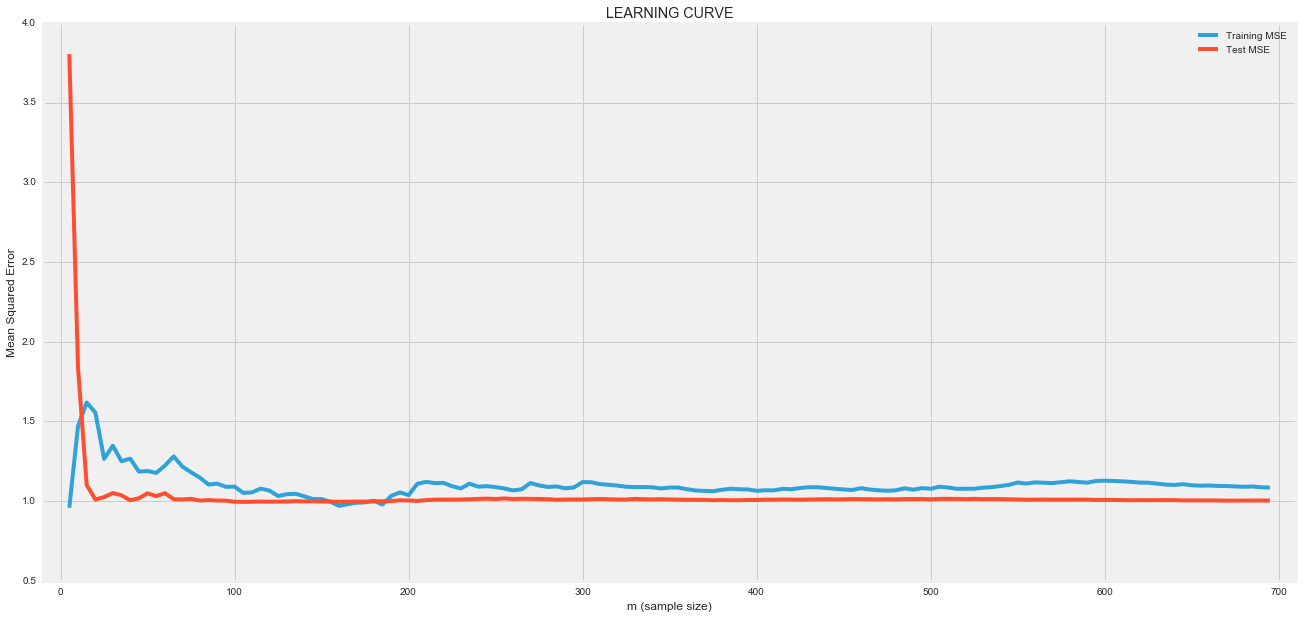

In [417]:
plt.figure(figsize = (20, 10))
plt.title('LEARNING CURVE')
plt.plot(m_list, training_errors)
plt.plot(m_list, testing_errors)
plt.xlabel('m (sample size)')
plt.ylabel('Mean Squared Error')
plt.xlim((-10, 710))
plt.legend(['Training MSE','Test MSE']);